In [18]:
from nltk.corpus import stopwords
import string

In [9]:
import tensorflow as tf

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<h1>Data</h1>

In [29]:
text = """Despise me, if I do not. Three great ones of the city,
In personal suit to make me his lieutenant,
Off-capp'd to him: and, by the faith of man,
I know my price, I am worth no worse a place:
But he; as loving his own pride and purposes,
Evades them, with a bombast circumstance
Horribly stuff'd with epithets of war;
And, in conclusion,
Nonsuits my mediators; for, 'Certes,' says he,
'I have already chose my officer.'
And what was he?
Forsooth, a great arithmetician,
One Michael Cassio, a Florentine,
A fellow almost damn'd in a fair wife;
That never set a squadron in the field,
Nor the division of a battle knows
More than a spinster; unless the bookish theoric,
Wherein the toged consuls can propose
As masterly as he: mere prattle, without practise,
Is all his soldiership. But he, sir, had the election:
And I, of whom his eyes had seen the proof
At Rhodes, at Cyprus and on other grounds
Christian and heathen, must be be-lee'd and calm'd
By debitor and creditor: this counter-caster,
He, in good time, must his lieutenant be,
And I--God bless the mark!--his Moorship's ancient."""

In [30]:
corpus = text.lower().split("\n")

<h1>Processing</h1>

In [21]:
punctuation = string.punctuation
print(punctuation)
stop = stopwords.words('english')
print(stop[:20])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [31]:
for i in range(len(corpus)):
    corpus[i] = "".join([j for j in corpus[i] if j not in punctuation])

In [34]:
#Tokenizer

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [52]:
input_sequence = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequence.append(n_gram_seq)

In [53]:
max_seq_len = max([len(x) for x in input_sequence])

In [56]:
input_sequence = pad_sequences(input_sequence,maxlen=max_seq_len,padding='pre')

In [57]:
input_sequence

array([[  0,   0,   0, ...,   0,  22,  11],
       [  0,   0,   0, ...,  22,  11,  23],
       [  0,   0,   0, ...,  11,  23,   5],
       ...,
       [  0,   0,   0, ..., 128,   2, 129],
       [  0,   0,   0, ...,   2, 129, 130],
       [  0,   0,   0, ..., 129, 130, 131]])

In [58]:
xs = input_sequence[:,:-1]
labels = input_sequence[:,-1]

In [60]:
total_word = len(tokenizer.word_index)+1

In [61]:
ys = tf.keras.utils.to_categorical(labels,num_classes=total_word)

In [64]:
ys[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_word,64,input_length= max_seq_len - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_word,activation='softmax')
])

In [67]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['acc'])

In [68]:
history = model.fit(xs,ys,epochs=500,verbose=1)

Train on 166 samples
Epoch 1/500
166/166 [==============================] - 9s 54ms/sample - loss: 4.8830 - acc: 0.0120
Epoch 2/500
166/166 [==============================] - 0s 655us/sample - loss: 4.8727 - acc: 0.0422
Epoch 3/500
166/166 [==============================] - 0s 571us/sample - loss: 4.8637 - acc: 0.0482
Epoch 4/500
166/166 [==============================] - 0s 595us/sample - loss: 4.8533 - acc: 0.0663
Epoch 5/500
166/166 [==============================] - 0s 667us/sample - loss: 4.8402 - acc: 0.0783
Epoch 6/500
166/166 [==============================] - 0s 529us/sample - loss: 4.8221 - acc: 0.0783
Epoch 7/500
166/166 [==============================] - 0s 577us/sample - loss: 4.7964 - acc: 0.0602
Epoch 8/500
166/166 [==============================] - 0s 682us/sample - loss: 4.7573 - acc: 0.0663
Epoch 9/500
166/166 [==============================] - 0s 595us/sample - loss: 4.7058 - acc: 0.0663
Epoch 10/500
166/166 [==============================] - 0s 719us/sample - loss: 

166/166 [==============================] - 0s 522us/sample - loss: 2.1910 - acc: 0.5060
Epoch 82/500
166/166 [==============================] - 0s 517us/sample - loss: 2.1664 - acc: 0.5181
Epoch 83/500
166/166 [==============================] - 0s 556us/sample - loss: 2.1482 - acc: 0.4880
Epoch 84/500
166/166 [==============================] - 0s 496us/sample - loss: 2.1225 - acc: 0.5181
Epoch 85/500
166/166 [==============================] - 0s 472us/sample - loss: 2.0989 - acc: 0.5181
Epoch 86/500
166/166 [==============================] - 0s 454us/sample - loss: 2.0759 - acc: 0.5301
Epoch 87/500
166/166 [==============================] - 0s 532us/sample - loss: 2.0484 - acc: 0.5422
Epoch 88/500
166/166 [==============================] - 0s 520us/sample - loss: 2.0280 - acc: 0.5663
Epoch 89/500
166/166 [==============================] - 0s 538us/sample - loss: 2.0057 - acc: 0.5723
Epoch 90/500
166/166 [==============================] - 0s 517us/sample - loss: 1.9837 - acc: 0.5783
Epo

166/166 [==============================] - 0s 613us/sample - loss: 1.0688 - acc: 0.9036
Epoch 162/500
166/166 [==============================] - 0s 733us/sample - loss: 1.0804 - acc: 0.8976
Epoch 163/500
166/166 [==============================] - 0s 751us/sample - loss: 1.0479 - acc: 0.8976
Epoch 164/500
166/166 [==============================] - 0s 823us/sample - loss: 1.0256 - acc: 0.8976
Epoch 165/500
166/166 [==============================] - 0s 697us/sample - loss: 1.0150 - acc: 0.9157
Epoch 166/500
166/166 [==============================] - 0s 613us/sample - loss: 0.9996 - acc: 0.9157
Epoch 167/500
166/166 [==============================] - 0s 613us/sample - loss: 0.9898 - acc: 0.9096
Epoch 168/500
166/166 [==============================] - 0s 559us/sample - loss: 0.9819 - acc: 0.9157
Epoch 169/500
166/166 [==============================] - 0s 571us/sample - loss: 0.9735 - acc: 0.9096
Epoch 170/500
166/166 [==============================] - 0s 523us/sample - loss: 0.9623 - acc: 0

166/166 [==============================] - 0s 517us/sample - loss: 0.5404 - acc: 0.9639
Epoch 242/500
166/166 [==============================] - 0s 703us/sample - loss: 0.5335 - acc: 0.9639
Epoch 243/500
166/166 [==============================] - 0s 709us/sample - loss: 0.5302 - acc: 0.9518
Epoch 244/500
166/166 [==============================] - 0s 499us/sample - loss: 0.5248 - acc: 0.9699
Epoch 245/500
166/166 [==============================] - 0s 577us/sample - loss: 0.5221 - acc: 0.9639
Epoch 246/500
166/166 [==============================] - 0s 511us/sample - loss: 0.5180 - acc: 0.9639
Epoch 247/500
166/166 [==============================] - 0s 523us/sample - loss: 0.5143 - acc: 0.9639
Epoch 248/500
166/166 [==============================] - 0s 661us/sample - loss: 0.5099 - acc: 0.9639
Epoch 249/500
166/166 [==============================] - 0s 715us/sample - loss: 0.5077 - acc: 0.9639
Epoch 250/500
166/166 [==============================] - 0s 487us/sample - loss: 0.5030 - acc: 0

166/166 [==============================] - 0s 631us/sample - loss: 0.3386 - acc: 0.9759
Epoch 322/500
166/166 [==============================] - 0s 553us/sample - loss: 0.3299 - acc: 0.9759
Epoch 323/500
166/166 [==============================] - 0s 559us/sample - loss: 0.3316 - acc: 0.9759
Epoch 324/500
166/166 [==============================] - 0s 685us/sample - loss: 0.3335 - acc: 0.9759
Epoch 325/500
166/166 [==============================] - 0s 709us/sample - loss: 0.3635 - acc: 0.9699
Epoch 326/500
166/166 [==============================] - 0s 547us/sample - loss: 0.3937 - acc: 0.9458
Epoch 327/500
166/166 [==============================] - 0s 625us/sample - loss: 0.3991 - acc: 0.9398
Epoch 328/500
166/166 [==============================] - 0s 629us/sample - loss: 0.4005 - acc: 0.9639
Epoch 329/500
166/166 [==============================] - 0s 535us/sample - loss: 0.3893 - acc: 0.9578
Epoch 330/500
166/166 [==============================] - 0s 625us/sample - loss: 0.3953 - acc: 0

166/166 [==============================] - 0s 583us/sample - loss: 0.2035 - acc: 0.9759
Epoch 402/500
166/166 [==============================] - 0s 529us/sample - loss: 0.2018 - acc: 0.9759
Epoch 403/500
166/166 [==============================] - 0s 559us/sample - loss: 0.2011 - acc: 0.9759
Epoch 404/500
166/166 [==============================] - 0s 517us/sample - loss: 0.2000 - acc: 0.9759
Epoch 405/500
166/166 [==============================] - 0s 565us/sample - loss: 0.1991 - acc: 0.9699
Epoch 406/500
166/166 [==============================] - 0s 457us/sample - loss: 0.1978 - acc: 0.9759
Epoch 407/500
166/166 [==============================] - 0s 505us/sample - loss: 0.1976 - acc: 0.9759
Epoch 408/500
166/166 [==============================] - 0s 523us/sample - loss: 0.1958 - acc: 0.9759
Epoch 409/500
166/166 [==============================] - 0s 535us/sample - loss: 0.1955 - acc: 0.9759
Epoch 410/500
166/166 [==============================] - 0s 505us/sample - loss: 0.1945 - acc: 0

166/166 [==============================] - 0s 517us/sample - loss: 0.1447 - acc: 0.9759
Epoch 481/500
166/166 [==============================] - 0s 535us/sample - loss: 0.1446 - acc: 0.9759
Epoch 482/500
166/166 [==============================] - 0s 643us/sample - loss: 0.1434 - acc: 0.9759
Epoch 483/500
166/166 [==============================] - 0s 517us/sample - loss: 0.1432 - acc: 0.9759
Epoch 484/500
166/166 [==============================] - 0s 529us/sample - loss: 0.1431 - acc: 0.9759
Epoch 485/500
166/166 [==============================] - 0s 535us/sample - loss: 0.1423 - acc: 0.9759
Epoch 486/500
166/166 [==============================] - 0s 529us/sample - loss: 0.1412 - acc: 0.9759
Epoch 487/500
166/166 [==============================] - 0s 493us/sample - loss: 0.1402 - acc: 0.9759
Epoch 488/500
166/166 [==============================] - 0s 511us/sample - loss: 0.1397 - acc: 0.9759
Epoch 489/500
166/166 [==============================] - 0s 505us/sample - loss: 0.1393 - acc: 0

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def plot(history,string):
    plt.plot(history.history[string],label=string)
    plt.xlabel("Epoch")
    plt.ylabel(string)

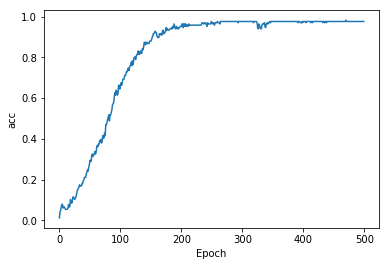

In [79]:
plot(history,'acc')

In [81]:
seed_text = "Nor the division of a battle"
for _ in range(50):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index==predicted:
            output_word = word
            break
    seed_text += " "+output_word
print(seed_text)

Nor the division of a battle knows knows knows knows knows knows propose ones the propose election election election election election practise man man his proof proof proof seen the election election election election practise proof man man his proof proof proof seen the election election election election practise proof man man his proof proof proof
